In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('howpop_train.csv')

In [5]:
df.shape

(134137, 17)

In [7]:
df.head(5).T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [7]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [8]:
df['year'] = df.published.apply(lambda ts: ts.year)
df['month'] = df.published.apply(lambda ts: ts.month)
df['day'] = df.published.apply(lambda ts: ts.day)
df['dayofweek'] = df.published.apply(lambda ts: ts.isoweekday())
df['hour'] = df.published.apply(lambda ts: ts.hour)

## 1. В каком месяце (и какого года) было больше всего публикаций?
    март 2016
    март 2015 - Correct!
    апрель 2015
    апрель 2016

In [13]:
df.groupby(['year', 'month'])[['title']].count().sort_values('title', 
                                                             ascending=False).head()

title
year month       
2015 3       2189
2016 3       2115
2015 7       2111
     4       2110
     12      2084

## 2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

    Один или несколько дней сильно выделяются из общей картины
    На хабре всегда больше статей, чем на гиктаймсе
    По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей
Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [9]:
df_march = df[(df.year == 2015) & (df.month == 3)]

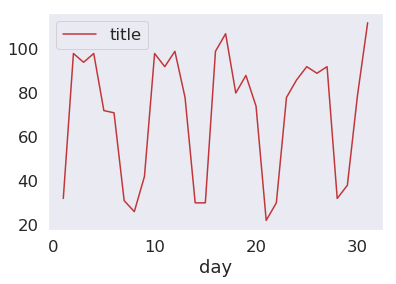

In [10]:
df_march.groupby('day')[['title']].count().plot()

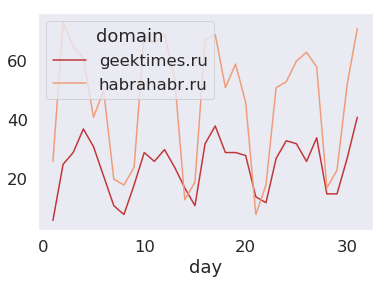

In [11]:
df_march.pivot_table(index='day', values='title', 
                     aggfunc='count', columns='domain').plot()

In [12]:
df_march[df_march.dayofweek == 6].pivot_table(index='day', 
                                              values='title', 
                                              aggfunc='count',
                                              columns='domain')

domain,geektimes.ru,habrahabr.ru
day,,
7,11,20
14,17,13
21,14,8
28,15,17


## 3. Когда лучше всего публиковать статью?
    Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
    У опубликованных в 10 утра постов больше всего комментариев
    Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - Correct!
    Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
    На хабре дневные статьи комментируют чаще, чем вечерние

In [14]:
df.groupby('hour')[['views']].mean().sort_values('views',
                                                 ascending=False).head()

,views
hour,
6,21354.310115
4,20678.389091
7,19093.953408
3,18370.017972
22,18365.387460


In [15]:
df.groupby('hour')[['comments']].mean().sort_values('comments', 
                                                    ascending = False).head()

,comments
hour,
4,53.657273
3,53.123877
6,51.799618
1,49.417910
2,48.827025


In [16]:
df[df.domain == 'geektimes.ru'].sort_values('comments', 
                                            ascending=False).head(1)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,day,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,1,5,2


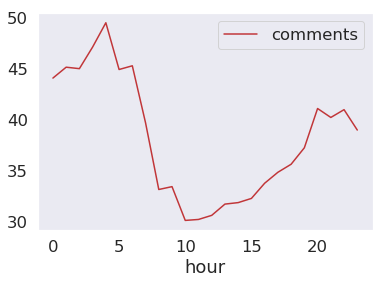

In [17]:
df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot()

## 4. Кого из топ-20 авторов чаще всего минусуют?
    @Mordatyj
    @Mithgol - Correct!
    @alizar
    @ilya42

In [18]:
df[df.author.isin([
    '@Mordatyj', '@Mithgol', 
    '@alizar', '@ilya42'])].groupby('author')[['votes_minus']]\
    .mean().sort_values('votes_minus', ascending = False)

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? 

In [19]:
df_frq = df.pivot_table(index='hour', values='title', 
                        aggfunc='count', columns='dayofweek')

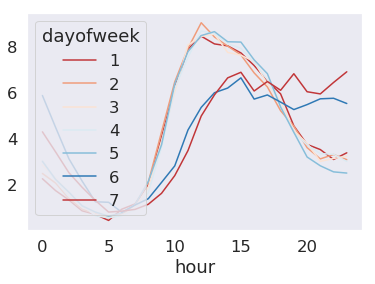

In [21]:
df_frq.apply(lambda x: 100. * x / df_frq.sum(), axis = 1).plot()